In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


In [2]:
df=pd.read_csv("/kaggle/input/weight-height/weight-height.csv")
print(df.head(20))

   Gender     Height      Weight
0    Male  73.847017  241.893563
1    Male  68.781904  162.310473
2    Male  74.110105  212.740856
3    Male  71.730978  220.042470
4    Male  69.881796  206.349801
5    Male  67.253016  152.212156
6    Male  68.785081  183.927889
7    Male  68.348516  167.971110
8    Male  67.018950  175.929440
9    Male  63.456494  156.399676
10   Male  71.195382  186.604926
11   Male  71.640805  213.741169
12   Male  64.766329  167.127461
13   Male  69.283070  189.446181
14   Male  69.243732  186.434168
15   Male  67.645620  172.186930
16   Male  72.418317  196.028506
17   Male  63.974326  172.883470
18   Male  69.640060  185.983958
19   Male  67.936005  182.426648


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

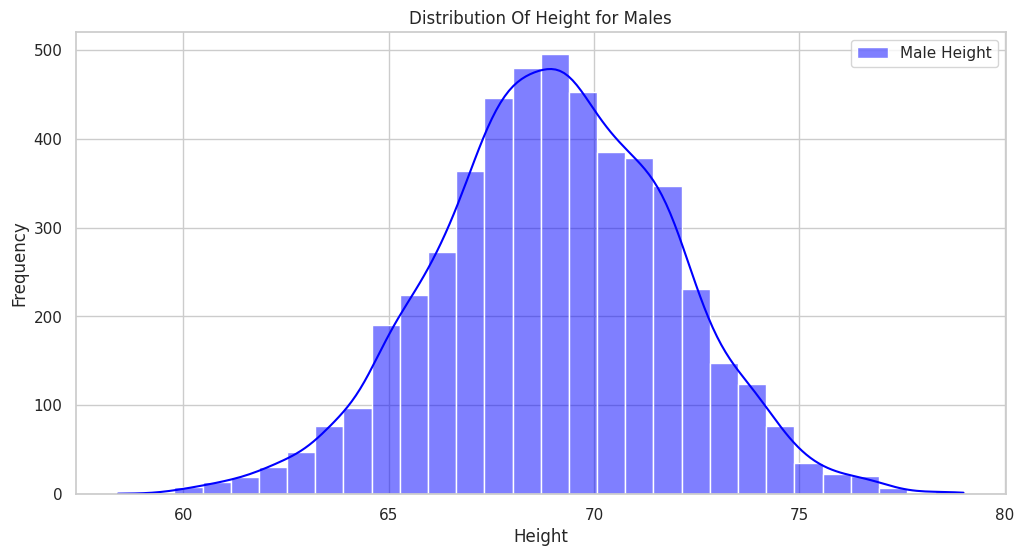

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#plotting the male height distribution
plt.figure(figsize=(12,6))
sns.histplot(df[df['Gender']=='Male']['Height'],bins=30,kde=True,color='blue',label='Male Height')
plt.title('Distribution Of Height for Males')
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.legend()
plt.show()

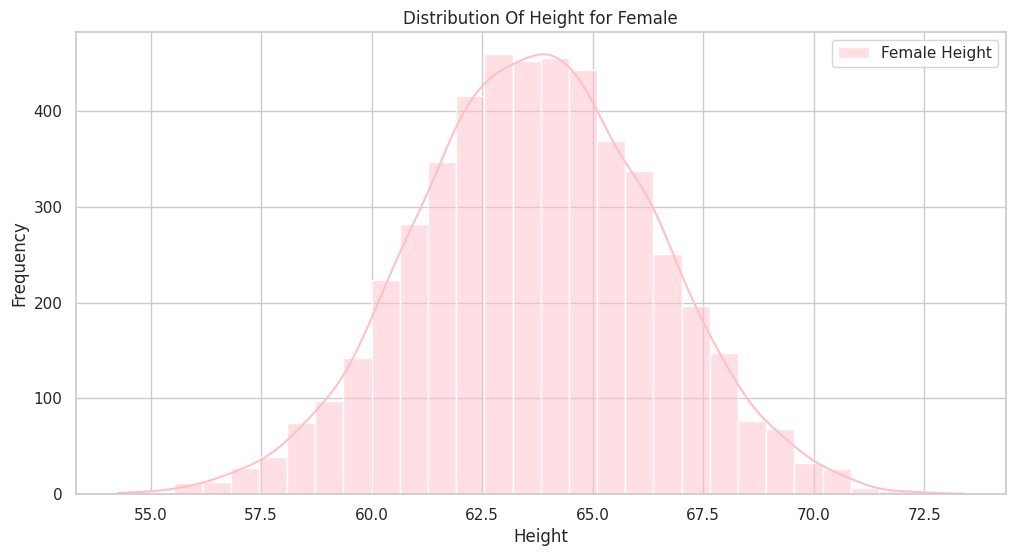

In [6]:
sns.set(style="whitegrid")

#plotting the female height distribution
plt.figure(figsize=(12,6))
sns.histplot(df[df['Gender']=='Female']['Height'],bins=30,kde=True,color='pink',label='Female Height')
plt.title('Distribution Of Height for Female')
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.legend()
plt.show()

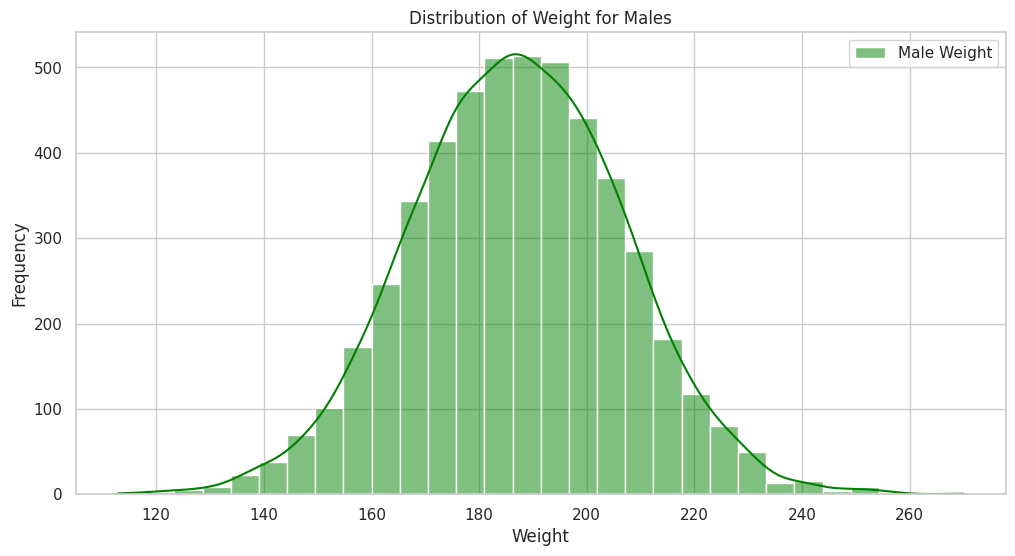

In [7]:
# Plot male weight distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Gender'] == 'Male']['Weight'], bins=30, kde=True, color='green', label='Male Weight')
plt.title('Distribution of Weight for Males')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()


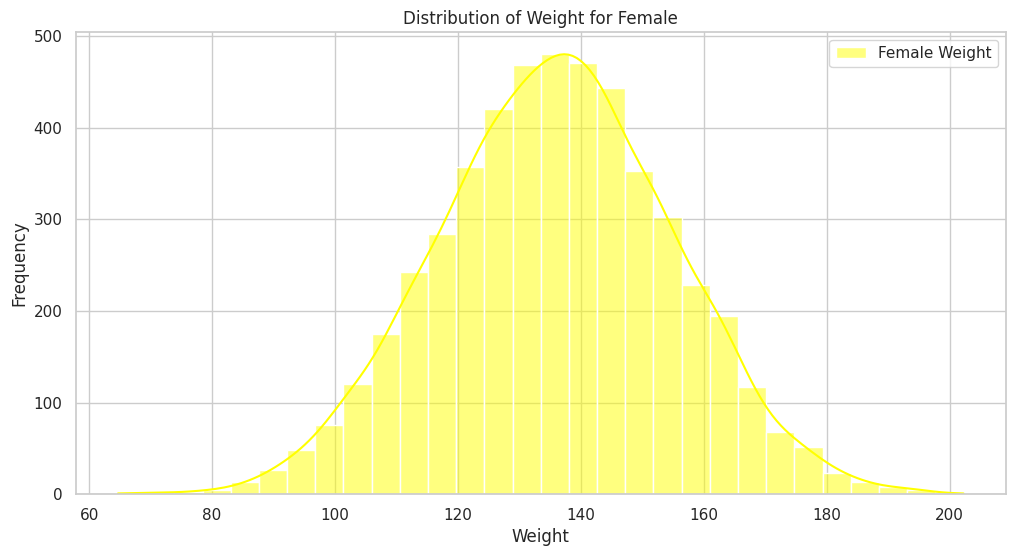

In [8]:
# Plot  female weight distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Gender'] == 'Female']['Weight'], bins=30, kde=True, color='yellow', label='Female Weight')
plt.title('Distribution of Weight for Female')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()


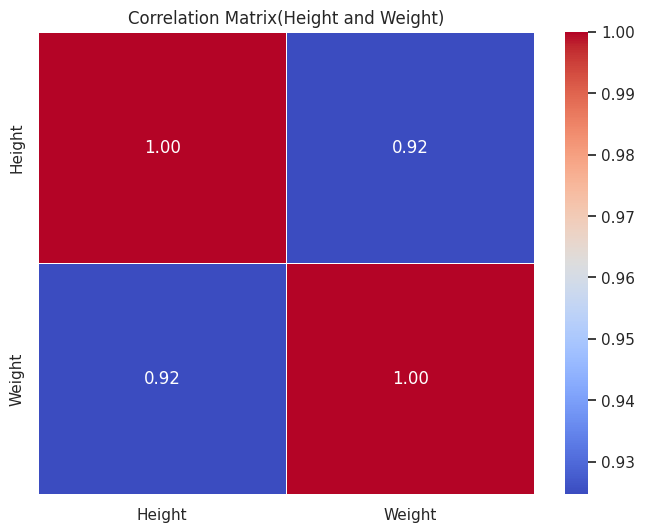

In [9]:
#Correlation Analysis:Explore the correlation matrix using heatmap
correlation_matrix=df[['Height','Weight']].corr()

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Matrix(Height and Weight)')
plt.show()


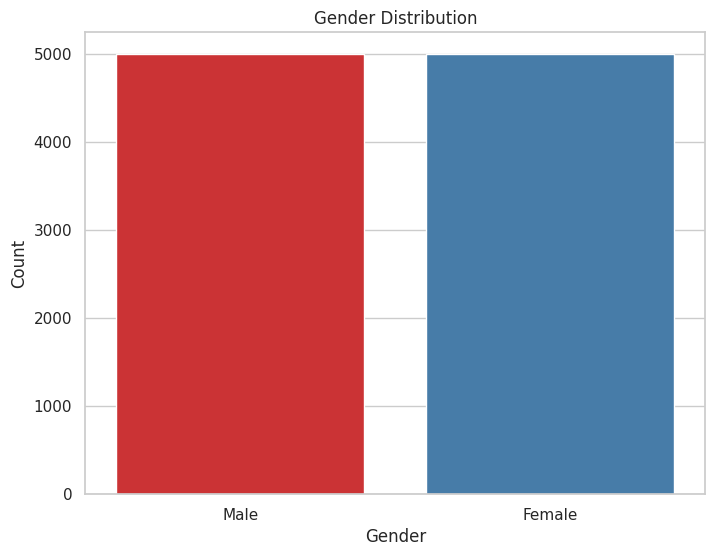

In [10]:
# Countplot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
# Convert height from inches to meters
df['Height_m'] = df['Height'] * 0.0254

# Convert weight from pounds to kilograms
df['Weight_kg'] = df['Weight'] * 0.453592

# Calculate BMI
df['BMI'] = df['Weight_kg'] / (df['Height_m'] ** 2)


In [12]:
df['BMI'].describe()

count    10000.000000
mean        25.475457
std          2.693810
min         15.448750
25%         23.464807
50%         25.733316
75%         27.558535
max         33.028103
Name: BMI, dtype: float64

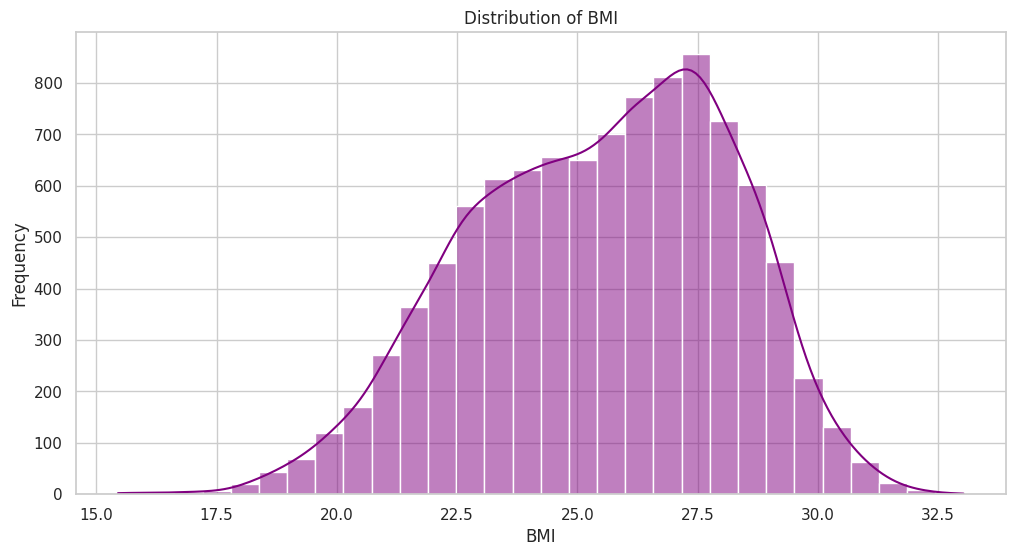

In [13]:
# Plot BMI distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='purple')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

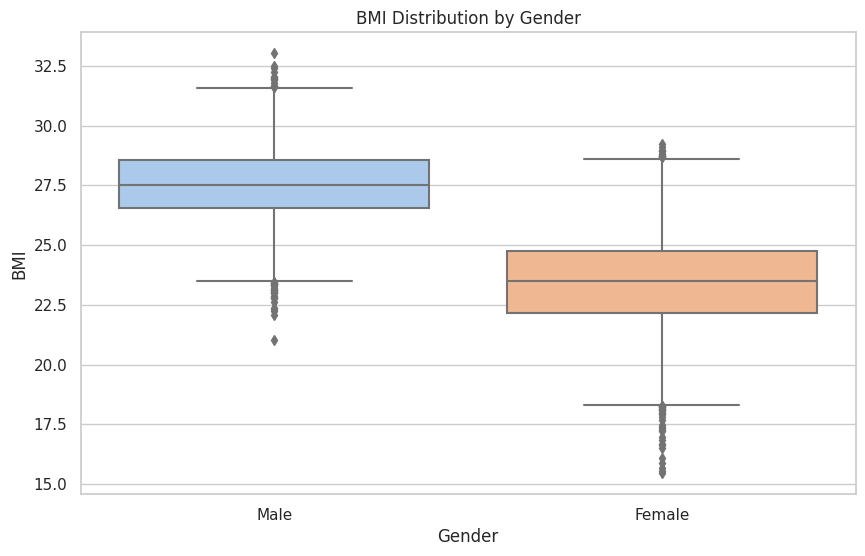

In [14]:
# Boxplot of BMI by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMI', data=df, palette='pastel')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()


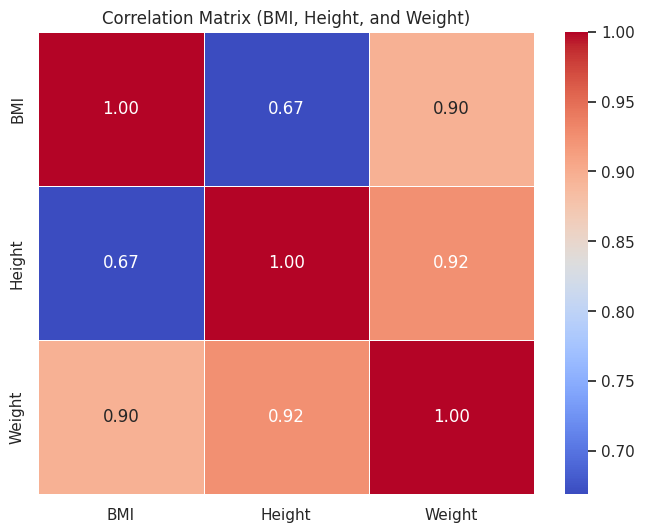

In [15]:
# Correlation matrix with BMI
bmi_corr_matrix = df[['BMI', 'Height', 'Weight']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(bmi_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (BMI, Height, and Weight)')
plt.show()


In [16]:
import numpy as np

#Creating a function for Outlier Detection using IQR
def detect_outlier_iqr(data,column):
    Q1=np.quantile(data[column],0.25)
    Q3=np.quantile(data[column],0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=data[(data[column]< lower_bound)|(data[column]>upper_bound)]
    
    return outliers



In [17]:
#Detect outliers in 'Weight'
weight_outliers=detect_outlier_iqr(df,'Weight')

#Detect outliers in 'Height'
height_outliers=detect_outlier_iqr(df,'Height')

#Detect outliers in BMI
bmi_outliers=detect_outlier_iqr(df,'BMI')

In [18]:
#Lets see the outliers
weight_outliers.head()

,Gender,Height,Weight,Height_m,Weight_kg,BMI
2014,Male,78.998742,269.989699,2.006568,122.465167,30.416189


In [19]:
height_outliers.head(15)

,Gender,Height,Weight,Height_m,Weight_kg,BMI
994,Male,78.095867,255.690835,1.983635,115.979317,29.475217
1317,Male,78.462053,227.342565,1.992936,103.120769,25.963269
2014,Male,78.998742,269.989699,2.006568,122.465167,30.416189
3285,Male,78.528210,253.889004,1.994617,115.162021,28.946126
3757,Male,78.621374,245.733783,1.996983,111.462878,27.949984
6624,Female,54.616858,71.393749,1.387268,32.383633,16.826923
7294,Female,54.873728,78.606670,1.393793,35.655357,18.353903
9285,Female,54.263133,64.700127,1.378284,29.347460,15.448750


In [20]:
bmi_outliers.head(15)

,Gender,Height,Weight,Height_m,Weight_kg,BMI
5360,Female,55.668202,68.982530,1.413972,31.289924,15.650301
6624,Female,54.616858,71.393749,1.387268,32.383633,16.826923
6811,Female,63.068203,93.424239,1.601932,42.376488,16.513404
6982,Female,56.764456,79.174376,1.441817,35.912863,17.275461
7427,Female,60.331972,86.059046,1.532432,39.035695,16.622618
7821,Female,65.263062,100.982899,1.657682,45.805035,16.669052
7935,Female,58.211650,77.523774,1.478576,35.164164,16.084703
8180,Female,60.336579,82.198488,1.532549,37.284577,15.874513
9285,Female,54.263133,64.700127,1.378284,29.347460,15.448750
9509,Female,60.694736,90.185406,1.541646,40.907379,17.212032
